In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan
import datetime
import plotly.express as px
from src.scripts.clinical_trials import combine_trials_json
from src.scripts.clinical_trials import plot_clinical_counts
from src.scripts.clinical_trials import classify_disease

### Combining all json files:

In [29]:
paths = ["../src/data/ZINC_references_trials_amel.json","../src/data/ZINC_references_trials_daphne.json", "../src/data/ZINC_references_trials_wes.json", "../src/data/ZINC_references_trials_greg.json", "../src/data/ZINC_references_trials_guillaume.json"]
df_all = combine_trials_json(paths)

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:120: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



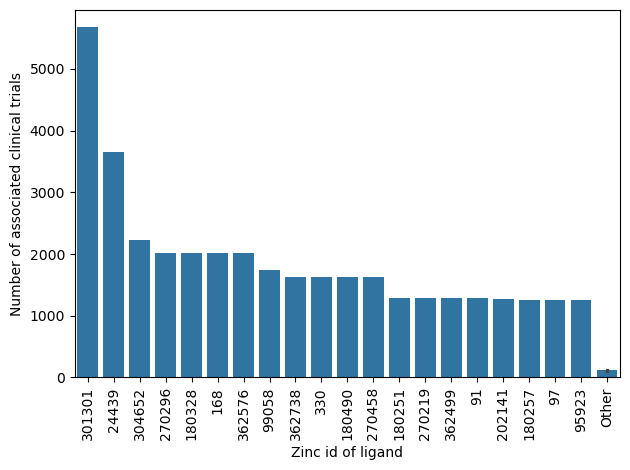

In [30]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="ZINC ID of Ligand",
    ylabel="Number of associated clinical trials",
    title="",
    top_n=20,
)
plt.tight_layout()
plt.show()

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



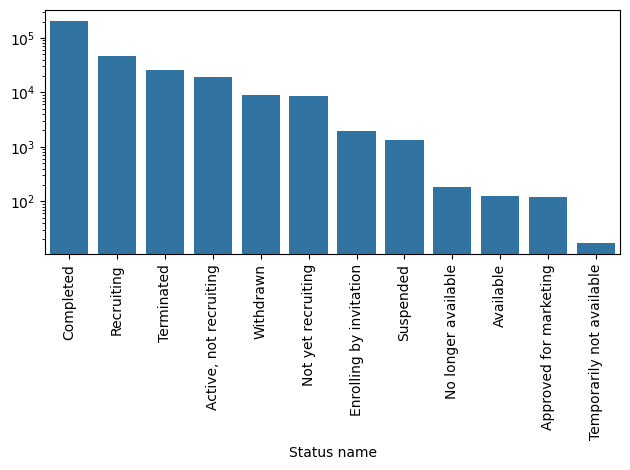

In [31]:
fig, ax = plt.subplots()
plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="status_name",
    ylabel="",
    title="",
    top_n=None,
    yscale="log",
)
plt.tight_layout()
plt.show()

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



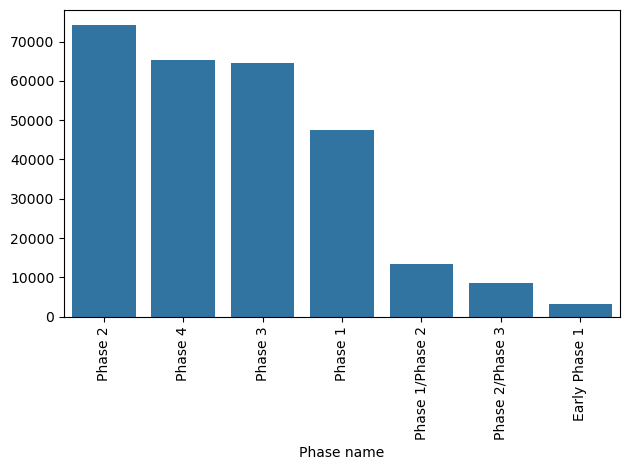

In [32]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="phase_name",
    ylabel="",
    title="",
    top_n=None,
    yscale=None,
)
plt.tight_layout()
plt.show()

<Axes: xlabel='start_date', ylabel='Count'>

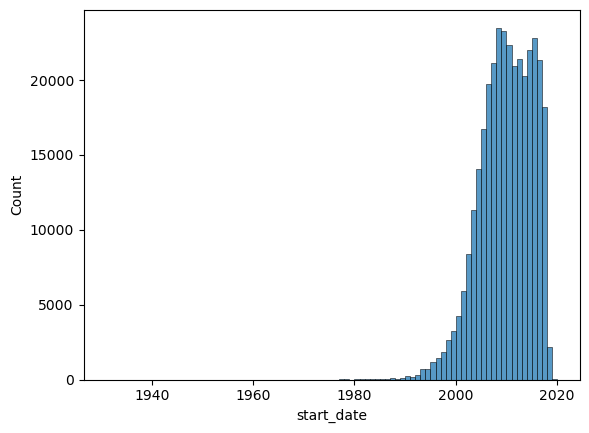

In [33]:
sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
)

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:120: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/clinical_trials.py:128: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. a

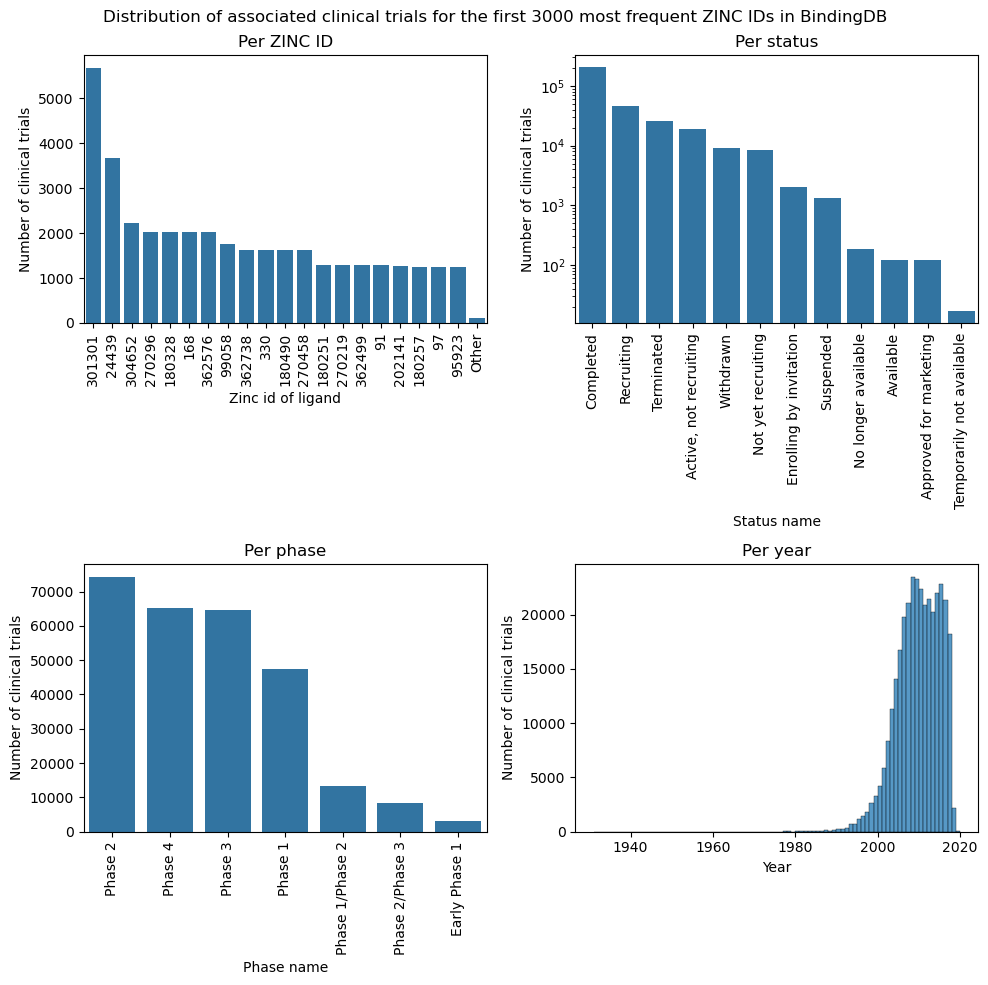

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
((ax1, ax2), (ax3, ax4)) = axes

ylabel = "Number of clinical trials"
list_kwargs = [
    dict(
        title="Per ZINC ID",
        col="ZINC ID of Ligand",
        ylabel=ylabel,
        top_n=20,
    ),
    dict(
        col="status_name",
        ylabel=ylabel,
        title="Per status",
        top_n=None,
        yscale="log",
    ),
    dict(
        col="phase_name",
        ylabel=ylabel,
        title="Per phase",
        top_n=None,
        yscale=None,
    ),
]

for ax, kwargs in zip(axes.flatten(), list_kwargs):
    plot_clinical_counts(df_all, ax, **kwargs)

sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
    ax=ax4,
)
ax4.set_title("Per year")
ax4.set_xlabel("Year")
ax4.set_ylabel(ylabel)

fig.suptitle(
    "Distribution of associated clinical trials for the first 3000 most frequent ZINC IDs in BindingDB"
)

plt.tight_layout()
plt.show()

### Clinical trials and disease classes: 

Importing BindingDB:

In [35]:
usecols = [
    "BindingDB Reactant_set_id",
    # "Ligand SMILES",
    # "Ligand InChI",
    # "Ligand InChI Key",
    # "BindingDB MonomerID",
    # "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    # "Ki (nM)",
    # "IC50 (nM)",
    # "Kd (nM)",
    # "EC50 (nM)",
    # "kon (M-1-s-1)",
    # "koff (s-1)",
    # "pH",
    # "Temp (C)",
    # "Curation/DataSource",
    # "Article DOI",
    # "BindingDB Entry DOI",
    # "PMID",
    # "PubChem AID",
    "Patent Number",
    # "Authors",
    # "Institution",
    # "Ligand HET ID in PDB",
    # "PDB ID(s) for Ligand-Target Complex",
    # "PubChem CID",
    # "PubChem SID",
    # "ChEBI ID of Ligand",
    # "ChEMBL ID of Ligand",
    # "DrugBank ID of Ligand",
    # "IUPHAR_GRAC ID of Ligand",
    # "KEGG ID of Ligand",
    "ZINC ID of Ligand",
    "Number of Protein Chains in Target (>1 implies a multichain complex)",
    "BindingDB Target Chain Sequence",
    "PDB ID(s) of Target Chain",
    "UniProt (SwissProt) Recommended Name of Target Chain",
    "UniProt (SwissProt) Entry Name of Target Chain",
    "UniProt (SwissProt) Primary ID of Target Chain",
    "UniProt (TrEMBL) Primary ID of Target Chain",
    "UniProt (TrEMBL) Submitted Name of Target Chain",
]

In [36]:
bindingDB = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
)

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_89127/280020811.py:1: DtypeWarning:

Columns (21,36,45,47) have mixed types. Specify dtype option on import or set low_memory=False.



We are interested in how many clinical trials study the top 20 disease classes in BindingDB.
To do this, we look at the same key words used to create disease classes (from diseases_plotting.py) in the trial descriptions:

In [37]:
df_all['disease_class'] = df_all['description'].apply(classify_disease)
df_diseases = df_all[df_all['disease_class'] != 'Unclassified']
df_diseases = df_diseases.groupby('disease_class').agg({
     'ZINC ID of Ligand': list,
     'code': list,
     'description': list,
     'status_name': list,
     'phase_name': list,
     'start_date': list
 }).reset_index()
df_diseases['number_trials']=df_diseases['code'].apply(len)
df_diseases = df_diseases.sort_values(by="number_trials",ascending=False)

In [38]:
fig = px.bar(
    df_diseases,
    x="number_trials",
    y="disease_class",
    orientation='h',
    title="Clinical trials per Disease Class",
    log_x=True
    )
fig.update_layout(
    yaxis_title="Disease Classes",
    xaxis_title="Number of trials",
    title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",
    xaxis=dict(
        zeroline=False,
        tickmode='array', 
        tickvals=[1, 10, 100, 1000, 10000, 100000], 
        ticktext=["1", "10", "100", "1k", "10k", "100k"]  
    )
)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

We are now interested in the status of each clinical trial:

In [39]:
status_exploded = df_diseases.explode('status_name')
status_exploded = (
    status_exploded.groupby(['status_name', 'disease_class'])
    .size()
    .reset_index(name='count')
)

fig = px.bar(status_exploded, x='disease_class', y='count', color='status_name', barmode='group',
             labels={'count': 'Trial Count', 'disease_class': 'Disease Class', 'status_name': 'Status'},
             title="Clinical Trial Status per Disease Class", log_y=True)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

Let's now look at these clinical trials over time.

In [40]:
date_exploded = df_diseases.explode(['start_date', 'phase_name'])
date_exploded['start_date'] = pd.to_datetime(date_exploded['start_date'], errors='coerce') 
date_exploded['Year'] = date_exploded['start_date'].dt.year
to_plot = (
    date_exploded
    .groupby(['Year', 'phase_name', 'disease_class'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)

In [41]:
fig = px.area(
    to_plot,
    x="Year",
    y="count",
    color="disease_class",
    line_group="phase_name",
    title="Clinical Trials Over Time",
    labels={"Year": "Year", "count": "Clinical trials"},
)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

In [42]:
# custom_style = """
# <style>
#   body, html {
#     background-color: rgb(34, 37, 41);
#   }
# </style>
# """

# # Save the HTML file and inject the custom style
# html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# # Insert the style in the <head>
# html_content = html_content.replace("</head>", f"{custom_style}</head>")

# # Write to a file
# with open("Timeseries_trials.html", "w") as f:
#     f.write(html_content)

# fig.write_image("Timeseries_trials.svg")

We are especially interested in trials with a "Completed" status:

In [43]:
def filter_completed_trials(row):
    completed_trials = [i for i, status in enumerate(row['status_name']) if status == 'Completed']
    return {
        'disease_class': row['disease_class'],
        'status_name': [row['status_name'][i] for i in completed_trials],
        'description': [row['description'][i] for i in completed_trials],
        'phase_name': [row['phase_name'][i] for i in completed_trials],
        'start_date': [row['start_date'][i] for i in completed_trials]
    }
filtered = df_diseases.apply(filter_completed_trials, axis=1)
completed_df = pd.DataFrame(filtered.tolist())

In [44]:
date_exploded = completed_df.explode(['start_date', 'phase_name'])
date_exploded['start_date'] = pd.to_datetime(date_exploded['start_date'], errors='coerce') 
date_exploded['Year'] = date_exploded['start_date'].dt.year
to_plot = (
    date_exploded
    .groupby(['Year', 'phase_name', 'disease_class'], as_index=False)
    .size()
    .rename(columns={'size': 'count'})
)
fig = px.area(
    to_plot,
    x="Year",
    y="count",
    color="disease_class",
    line_group="phase_name",
    title="Completed Clinical Trials Over Time",
    labels={"Year": "Year", "count": "Clinical trials"},
)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

In [45]:
# custom_style = """
# <style>
#   body, html {
#     background-color: rgb(34, 37, 41);
#   }
# </style>
# """

# # Save the HTML file and inject the custom style
# html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# # Insert the style in the <head>
# html_content = html_content.replace("</head>", f"{custom_style}</head>")

# # Write to a file
# with open("Timeseries_completed_trials.html", "w") as f:
#     f.write(html_content)

# fig.write_image("Timeseries_completed_trials.svg")

Now, only clinical trials with a 'Terminated' status:

In [46]:
status_date_exploded = df_diseases.explode(['status_name', 'start_date'], ignore_index=True)

In [47]:
terminated = status_date_exploded[status_date_exploded['status_name']=='Terminated']
date_terminated = (
    terminated.groupby(['start_date', 'disease_class'])
    .size()
    .reset_index(name='count')
)
date_terminated['start_date'] = pd.to_datetime(date_terminated['start_date'])
date_terminated['Year'] = date_terminated['start_date'].dt.year
aggregated_df = date_terminated.groupby(['Year', 'disease_class'], as_index=False)['count'].sum()
fig = px.area(
    aggregated_df,
    x="Year",
    y="count",
    color="disease_class",
    line_group="disease_class",
    title="Terminated Clinical Trials per Disease Over Time",
    labels={"Year": "Year", "count": "Clinical trials"},
)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

We are now interested in the phase of each clinical trial:

In [48]:
phase_exploded = df_diseases.explode('phase_name')
phase_exploded = (
    phase_exploded.groupby(['phase_name', 'disease_class'])
    .size()
    .reset_index(name='count')
)
fig = px.bar(phase_exploded, x='disease_class', y='count', color='phase_name', barmode='group',
             labels={'count': 'Trial Count', 'disease_class': 'Disease Class', 'phase_name': 'Phases'},
             title="Clinical Trial Phases per Disease Class", log_y=True)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

Phase 1 - Assessing initial safety and dosage
Phase 2 - Evaluating effectiveness and side effects
Phase 3 - Confirming efficacy compared to standard treatments
Phase 4 - Ongoing study of long-term effects after approval

Which disease class has most phase 4 clinical trials ? (relatively to total number of clinical trials for this disease)

In [49]:
total_counts = phase_exploded.groupby('disease_class')['count'].transform('sum')
phase_exploded['count_percentage'] = (phase_exploded['count'] / total_counts)*100
fig = px.bar(phase_exploded, x='disease_class', y='count_percentage', color='phase_name', barmode='group',
             labels={'count_percentage': 'Trial Count [%]', 'disease_class': 'Disease Class', 'phase_name': 'Phases'},
             title="Clinical Trial Phases per Disease Class")
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

In [50]:
phase_date_exploded = df_diseases.explode(['phase_name', 'start_date'], ignore_index=True)
phase2 = phase_date_exploded[(phase_date_exploded['phase_name'] == 'Phase 2') | (phase_date_exploded['phase_name'] == 'Phase 2/Phase 3')]
date_phase2 = (
    phase2.groupby(['start_date', 'disease_class'])
    .size()
    .reset_index(name='count')
)
date_phase2['start_date'] = pd.to_datetime(date_phase2['start_date'])
date_phase2['Year'] = date_phase2['start_date'].dt.year

In [51]:
temp = date_phase2.groupby(['Year', 'disease_class'], as_index=False)['count'].sum()
fig = px.area(
    temp,
    x="Year",
    y="count",
    color="disease_class",
    line_group="disease_class",
    title="Phase 2 Clinical Trials Over Time",
    labels={"Year": "Year", "count": "Clinical trials"},
)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()

In [52]:
early_phase1 = phase_date_exploded[(phase_date_exploded['phase_name'] == 'Early Phase 1')]
date_early1 = (
    early_phase1.groupby(['start_date', 'disease_class'])
    .size()
    .reset_index(name='count')
)
date_early1['start_date'] = pd.to_datetime(date_early1['start_date'])
date_early1['Year'] = date_early1['start_date'].dt.year
agg_plot = date_early1.groupby(['Year', 'disease_class'], as_index=False)['count'].sum()
fig = px.area(
    agg_plot,
    x="Year",
    y="count",
    color="disease_class",
    line_group="disease_class",
    title="Early Phase 1 Clinical Trials Over Time",
    labels={"Year": "Year", "count": "Clinical trials"},
)
fig.update_layout( title_x=0.5,    
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark",)
fig.show()